In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import csv
import io

In [4]:
!gdown 16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h

Downloading...
From: https://drive.google.com/uc?id=16uFzwzOA31PoWhTSNNe6XdQzprhPIk4h
To: /content/4K_House_Rent_Dataset.csv
100% 567k/567k [00:00<00:00, 123MB/s]


In [5]:
values = pd.read_csv("4K_House_Rent_Dataset.csv")

In [10]:
def replace(targetList, newItem, newList):
    return [newList if item == newItem else item for item in targetList]

In [6]:
x1 = values['Size'].values
x2 = values['BHK'].values
x3 = values['Bathroom'].values
x4 = values['Furnishing Status'].values
y = values['Rent'].values

In [ ]:
mean = round(np.mean(x1))
max = max(x1)
min = min(x1)

In [12]:
x4 = replace(x4,'Furnished',3)
x4 = replace(x4,'Semi-Furnished',2)
x4 = replace(x4,'Unfurnished',1)

In [13]:
Y = [np.array(y)]
Y = np.transpose(Y)
print(Y)

[[10000]
 [20000]
 [17000]
 ...
 [35000]
 [45000]
 [15000]]


In [14]:
X = []
column = 5
row = len(Y)
for r in range(row):
  temp_list = []
  temp_list.append(1)
  temp_list.append(x1[r])
  temp_list.append(x2[r])
  temp_list.append(x3[r])
  temp_list.append(x4[r])
  X.append(temp_list)

In [18]:
from numpy.linalg import inv

In [19]:
transpose = np.transpose(X)
print(transpose)

In [20]:
transposeMultiplyX = np.matmul(transpose,X)


In [21]:
inverse = inv(transposeMultiplyX)
print(inverse)

[[ 2.70809103e-03  3.81135845e-07 -6.13810508e-04 -1.73522605e-04
  -7.07564179e-04]
 [ 3.81135845e-07  1.29166178e-09 -3.40965149e-07 -4.24053760e-07
  -4.92092169e-08]
 [-6.13810508e-04 -3.40965149e-07  9.16492515e-04 -5.06772440e-04
   1.70915380e-05]
 [-1.73522605e-04 -4.24053760e-07 -5.06772440e-04  8.80917788e-04
  -5.22092778e-05]
 [-7.07564179e-04 -4.92092169e-08  1.70915380e-05 -5.22092778e-05
   4.66929681e-04]]


In [23]:
transposeMultiplyY = np.matmul(transpose,Y)

In [24]:
angle = np.matmul(inverse,transposeMultiplyY)
print(angle)

[[-4.93089571e+04]
 [ 2.35095594e+01]
 [-1.29289804e+03]
 [ 2.64676202e+04]
 [ 6.93957077e+03]]


In [26]:
ang1 = angle[0][0]
ang2 = angle[1][0]
ang3 = angle[2][0]
ang4 = angle[3][0]
ang5 = angle[4][0]
print(ang1,ang2,ang3,ang4,ang5)

-49308.9570519877 23.509559413395415 -1292.8980373916556 26467.620179929152 6939.570768955076


In [27]:
sum = 0
for j in range(len(x1)):
    temp_sum = ang1 +  ang2*x1[j] + ang3*x2[j] + ang4*x3[j] + ang5*x4[j] - y[j]
    temp_sum = temp_sum * temp_sum
    sum = sum + temp_sum
    
cost = sum/(2*len(x1))
print(cost)

2394004443.1277804


In [29]:
prediction = ang1 + ang2*1100 + ang3*2 + ang4*2 + ang5*1
print(prediction)

33840.57335677733


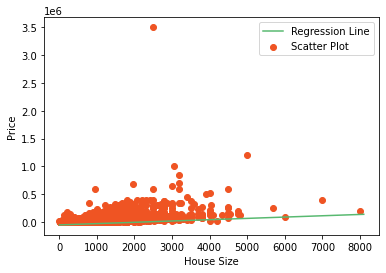

In [31]:
max_x = np.max(x1) + 100
min_x = np.min(x1)
x = np.linspace(min_x, max_x, 1000)
yy = ang2 * x + ang1
plt.plot(x, yy, color='#58b970', label='Regression Line')
plt.scatter(x1, y, c = "#ef5423", label = 'Scatter Plot')

plt.xlabel('House Size')
plt.ylabel('Price')
plt.legend()
plt.show()